# Ordinary Differential Equations Exercise 1

## Imports

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed

## Euler's method

[Euler's method](http://en.wikipedia.org/wiki/Euler_method) is the simplest numerical approach for solving a first order ODE numerically. Given the differential equation

$$ \frac{dy}{dx} = f(y(x), x) $$

with the initial condition:

$$ y(x_0)=y_0 $$

Euler's method performs updates using the equations:

$$ y_{n+1} = y_n + h f(y_n,x_n) $$

$$ h = x_{n+1} - x_n $$

Write a function `solve_euler` that implements the Euler method for a 1d ODE and follows the specification described in the docstring:

In [69]:
def solve_euler(derivs, y0, x):
    """Solve a 1d ODE using Euler's method.
    
    Parameters
    ----------
    derivs : function
        The derivative of the diff-eq with the signature deriv(y,x) where
        y and x are floats.
    y0 : float
        The initial condition y[0] = y(x[0]).
    x : np.ndarray, list, tuple
        The array of times at which of solve the diff-eq.
    
    Returns
    -------
    y : np.ndarray
        Array of solutions y[i] = y(x[i])
    """
    h=x[1]-x[0]
    y=np.empty(len(x))
    y[0]=y0
    for i in range(len(x)-1):
        y[i+1]=y[i]+derivs(x[i],y[i])*h
    return y

In [70]:
solve_euler(lambda y, x: 1, 0, [0,1,2])

array([ 0.,  1.,  2.])

In [71]:
assert np.allclose(solve_euler(lambda y, x: 1, 0, [0,1,2]), [0,1,2])

The [midpoint method]() is another numerical method for solving the above differential equation. In general it is more accurate than the Euler method. It uses the update equation:

$$ y_{n+1} = y_n + h f\left(y_n+\frac{h}{2}f(y_n,x_n),x_n+\frac{h}{2}\right) $$

Write a function `solve_midpoint` that implements the midpoint method for a 1d ODE and follows the specification described in the docstring:

In [72]:
def solve_midpoint(derivs, y0, x):
    """Solve a 1d ODE using the Midpoint method.
    
    Parameters
    ----------
    derivs : function
        The derivative of the diff-eq with the signature deriv(y,x) where y
        and x are floats.
    y0 : float
        The initial condition y[0] = y(x[0]).
    x : np.ndarray, list, tuple
        The array of times at which of solve the diff-eq.
    
    Returns
    -------
    y : np.ndarray
        Array of solutions y[i] = y(x[i])
    """
    h=x[1]-x[0]
    y=np.empty(len(x))
    y[0]=y0
    for i in range(len(x)-1):
        y[i+1]=y[i]+h*derivs(y[i]+.5*h*derivs(x[i],y[i]),x[i]+.5*h)
    return y

In [73]:
assert np.allclose(solve_midpoint(lambda y, x: 1, 0, [0,1,2]), [0,1,2])

You are now going to solve the following differential equation:

$$
\frac{dy}{dx} = x + 2y
$$

which has the analytical solution:

$$
y(x) = 0.25 e^{2x} - 0.5 x - 0.25
$$

First, write a `solve_exact` function that compute the exact solution and follows the specification described in the docstring:

In [74]:
def solve_exact(x):
    """compute the exact solution to dy/dx = x + 2y.
    
    Parameters
    ----------
    x : np.ndarray
        Array of x values to compute the solution at.
    
    Returns
    -------
    y : np.ndarray
        Array of solutions at y[i] = y(x[i]).
    """
    y=np.empty(len(x))
    for i in range(len(x)):
        y[i]=.25*np.exp(2*x[i])-.5*x[i]-.25
    return y
    raise NotImplementedError()

In [75]:
assert np.allclose(solve_exact(np.array([0,1,2])),np.array([0., 1.09726402, 12.39953751]))

In the following cell you are going to solve the above ODE using four different algorithms:

1. Euler's method
2. Midpoint method
3. `odeint`
4. Exact

Here are the details:

* Generate an array of x values with $N=11$ points over the interval $[0,1]$ ($h=0.1$).
* Define the `derivs` function for the above differential equation.
* Using the `solve_euler`, `solve_midpoint`, `odeint` and `solve_exact` functions to compute
  the solutions using the 4 approaches.

Visualize the solutions on a sigle figure with two subplots:

1. Plot the $y(x)$ versus $x$ for each of the 4 approaches.
2. Plot $\left|y(x)-y_{exact}(x)\right|$ versus $x$ for each of the 3 numerical approaches.

Your visualization should have legends, labeled axes, titles and be customized for beauty and effectiveness.

While your final plot will use $N=10$ points, first try making $N$ larger and smaller to see how that affects the errors of the different approaches.

In [40]:
odeint?

In [76]:
x=np.linspace(0,1,11)
def derivs(x,y):
    d=x+2*y
    return d
E=solve_euler(derivs,0,x)
M=solve_midpoint(derivs, 0, x)
O=odeint(derivs,0,x)
X=solve_exact(x)
print('Euler=',E)
print('Midpoint=',M)
print('Odeint=',O)
print('Exact=',X)

Euler= [ 0.          0.          0.01        0.032       0.0684      0.12208
  0.196496    0.2957952   0.42495424  0.58994509  0.79793411]
Midpoint= [ 0.          0.01        0.0416      0.097176    0.17936536  0.29109555
  0.43561606  0.61653383  0.83785255  1.10401633  1.41995812]
Odeint= [[ 0.        ]
 [ 0.01034183]
 [ 0.04280551]
 [ 0.09971761]
 [ 0.18364939]
 [ 0.29744254]
 [ 0.44423766]
 [ 0.62750544]
 [ 0.8510819 ]
 [ 1.11920627]
 [ 1.43656371]]
Exact= [ 0.          0.00535069  0.02295617  0.0555297   0.10638523  0.17957046
  0.28002923  0.41379999  0.58825811  0.81241187  1.09726402]


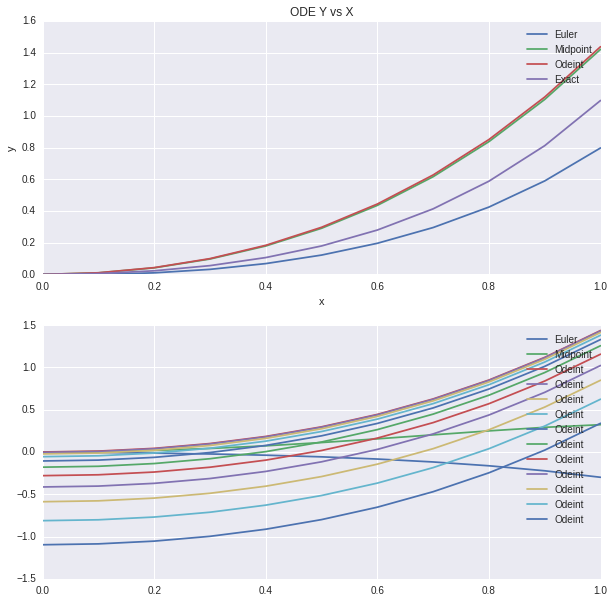

In [77]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(x,E,label='Euler')
plt.plot(x,M,label='Midpoint')
plt.plot(x,O,label='Odeint')
plt.plot(x,X,label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.title('ODE Y vs X')
plt.legend()
plt.subplot(2,1,2)
plt.plot(x,E-X,label='Euler')
plt.plot(x,M-X,label='Midpoint')
plt.plot(x,O-X,label='Odeint')
plt.legend()

In [ ]:
assert True # leave this for grading the plots